<a href="https://colab.research.google.com/github/Ammulaanusha2005/23CSBTB30/blob/main/Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
import seaborn as sn
train_df=pd.read_csv("titanic_train.csv")
train_df.head()
test_df=pd.read_csv("titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
train_df = pd.read_csv("/content/titanic_train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("/content/titanic_test.csv")

# preview train data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))


The number of samples into the train data is 891.


In [4]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))


The number of samples into the test data is 418.


In [6]:
train_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Age" records is 19.87%


In [9]:
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))


The mean of "Age" is 29.70
The median of "Age" is 28.00


In [10]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Cabin" records is 77.10%


In [11]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Embarked" records is 0.22%


In [14]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)


In [16]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)


In [17]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


In [21]:
train_data['IsMinor']=np.where(train_data['Age']<=16, 1, 0) # Use train_data instead of final_train

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

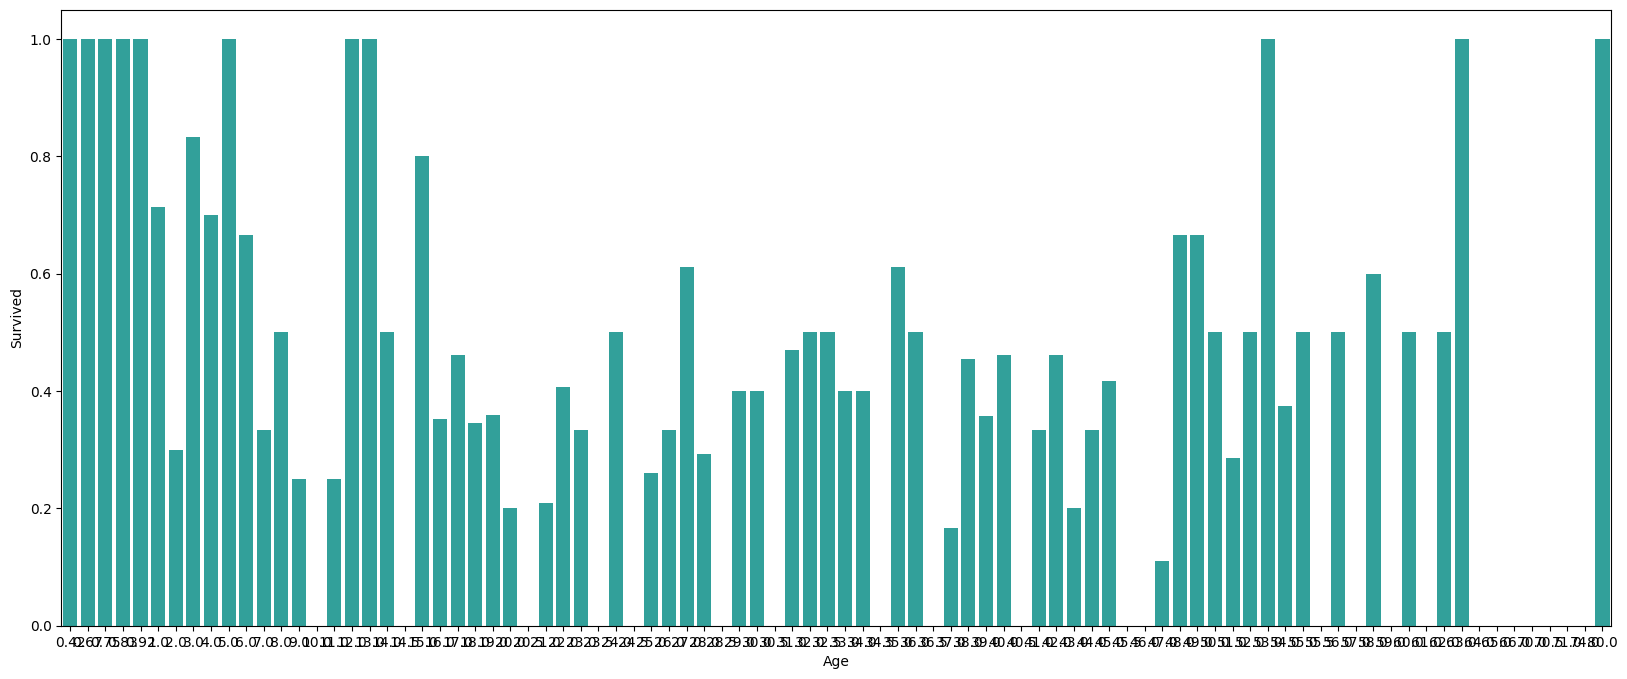

In [23]:
plt.figure(figsize=(20,8))
avg_survival_byage = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean() # Use train_data instead of final_train
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

<ipython-input-25-7d4802a6f433>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True) # Use train_data instead of final_train
<ipython-input-25-7d4802a6f433>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)


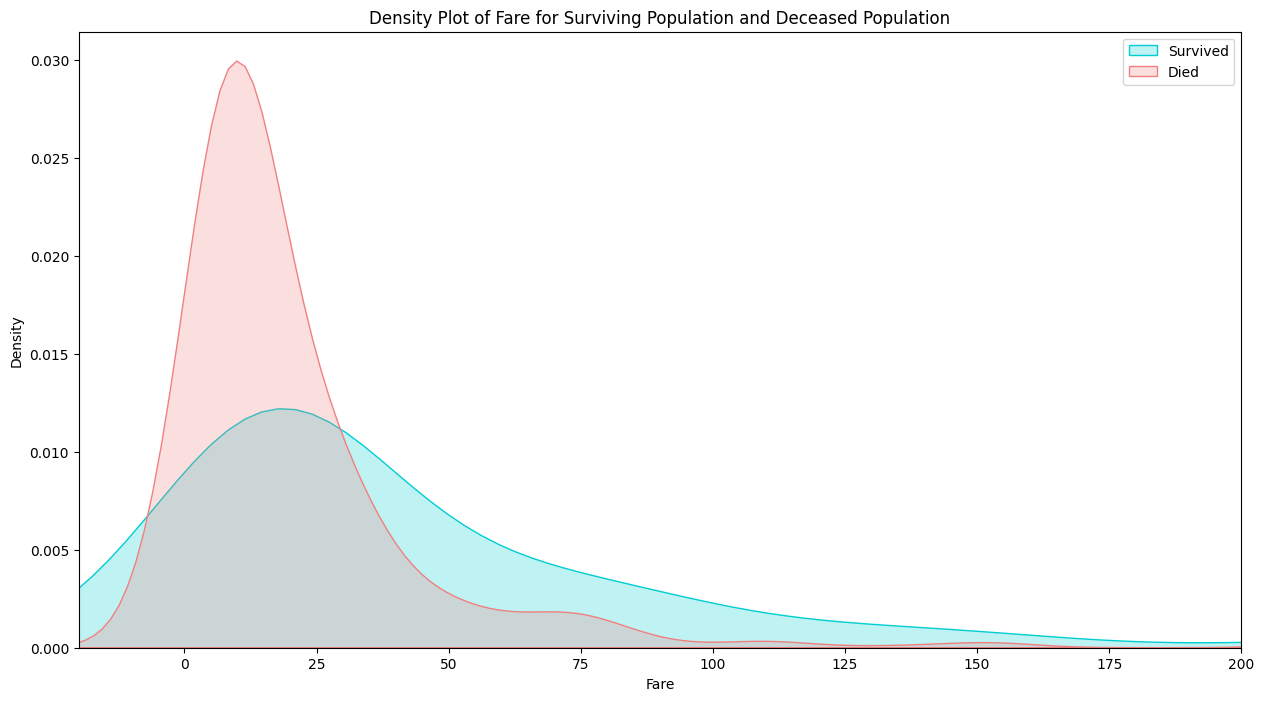

In [25]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True) # Use train_data instead of final_train
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

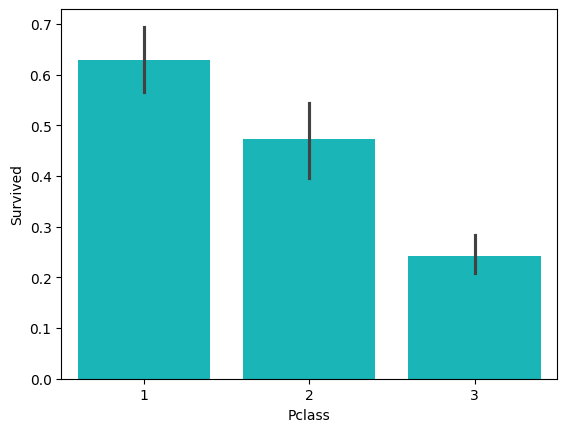

In [27]:
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise") # Pass 'Pclass' and 'Survived' as keyword arguments
plt.show()

<class 'function'>


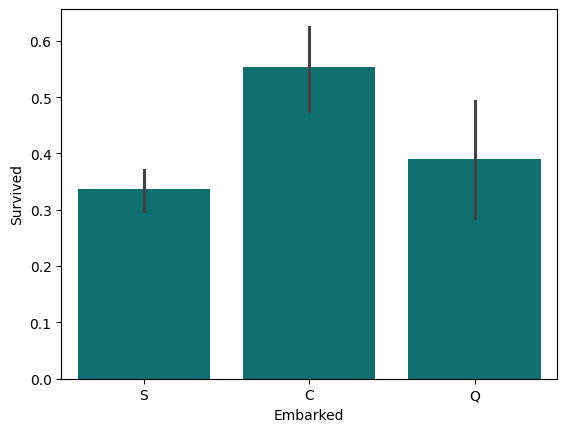

In [30]:

print(type(sns.barplot))


if not callable(sns.barplot):
    import seaborn as sns # Re-import seaborn to reset sns.barplot to the original function

# Now try running the original code again
sns.barplot(x='Embarked', y='Survived', data=train_df, color="teal") # Pass 'Embarked' and 'Survived' as keyword arguments
plt.show()

<class 'function'>


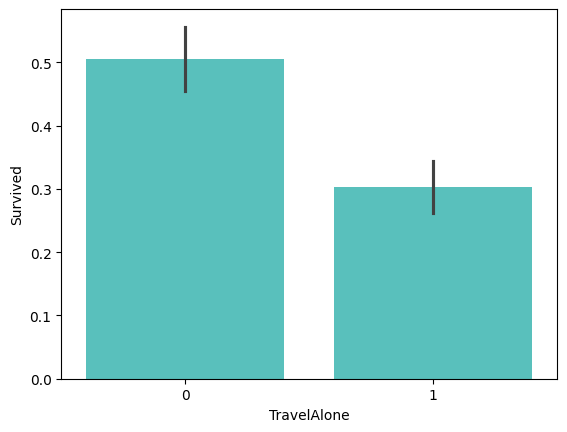

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if sns.barplot is callable
print(type(sns.barplot))

# If not callable, re-import seaborn to reset sns.barplot
if not callable(sns.barplot):
    import seaborn as sns

# Now try running the original code again with keyword arguments for x and y
sns.barplot(x='TravelAlone', y='Survived', data=train_data, color="mediumturquoise")
plt.show()

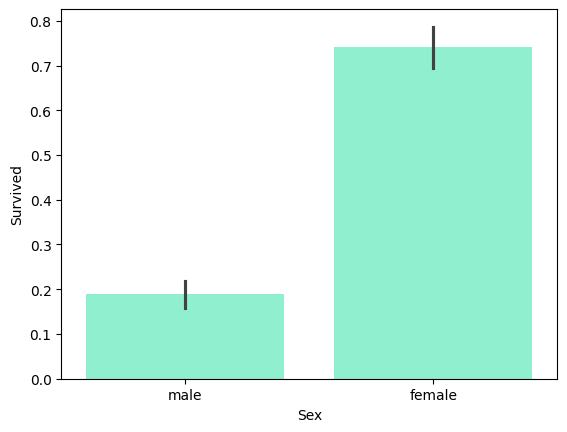

In [53]:
sns.barplot(x='Sex', y='Survived', data=train_df, color="aquamarine") # Use keyword arguments to explicitly assign values to x and y.
plt.show()

In [59]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# If X is a DataFrame, use this code
if isinstance(X, pd.DataFrame):
  # Impute missing values using the mean
  imputer = SimpleImputer(strategy='mean')
  X_imputed = imputer.fit_transform(X)

  # Convert the imputed array back to a DataFrame
  X = pd.DataFrame(X_imputed, columns=X.columns)

# If X is not a DataFrame (e.g., a NumPy array), use this code
else:
  # Impute missing values using the mean
  imputer = SimpleImputer(strategy='mean')

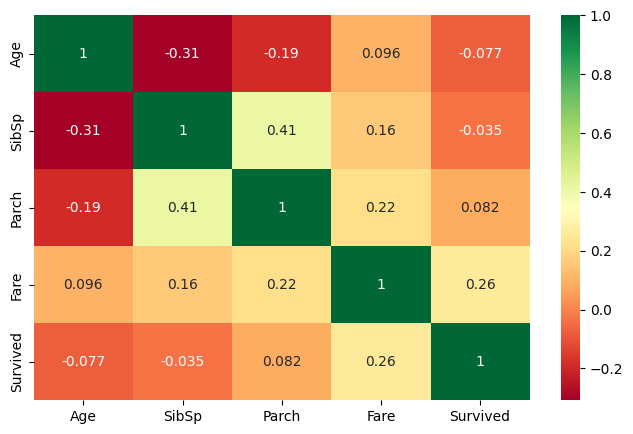

In [62]:
Selected_features = ['Age', 'SibSp', 'Parch', 'Fare',  'Survived'] # Corrected feature names based on the available columns in final_train
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.impute import SimpleImputer # import the imputer
import numpy as np

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # instantiate the imputer
X_train = imputer.fit_transform(X_train) # fit and transform the training data
X_test = imputer.transform(X_test) # transform the test data

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))

Train/Test split results:
LogisticRegression accuracy is 1.000
LogisticRegression log_loss is 0.023


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline # import the Pipeline object
import numpy as np

X = final_train[Selected_features]
y = final_train['Survived']

# Create a pipeline with an imputer and the logistic regression model
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values
    ('logreg', LogisticRegression())
])

param_grid = {'logreg__C': np.arange(1e-05, 3, 0.1)} # Adjust parameter names for pipeline
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(pipe, return_train_score=True,
                  param_grid=param_grid, scoring=scoring, refit='AUC', cv=5)